<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import math
from IPython.display import HTML, display

seaborn.set_context('talk')

In [2]:
import math
import time

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [5]:
df.dtypes

profile_gender                                   object
profile_age                                       int64
work_country                                     object
work_province                                    object
profile_years_experience                        float64
work_years_in_company                           float64
work_years_in_current_position                  float64
work_people_in_charge_of                          int64
profile_studies_level                            object
profile_studies_level_state                      object
profile_career                                   object
profile_university                               object
profile_specialization_courses                   object
profile_open_source_contributions                object
profile_programming_as_hobby                     object
work_role                                        object
tools_platform                                   object
tools_programming_languages                     

The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation

Vemos si existen correlaciones entre variables. De existir variables correlacionadas, podemos descartarlas

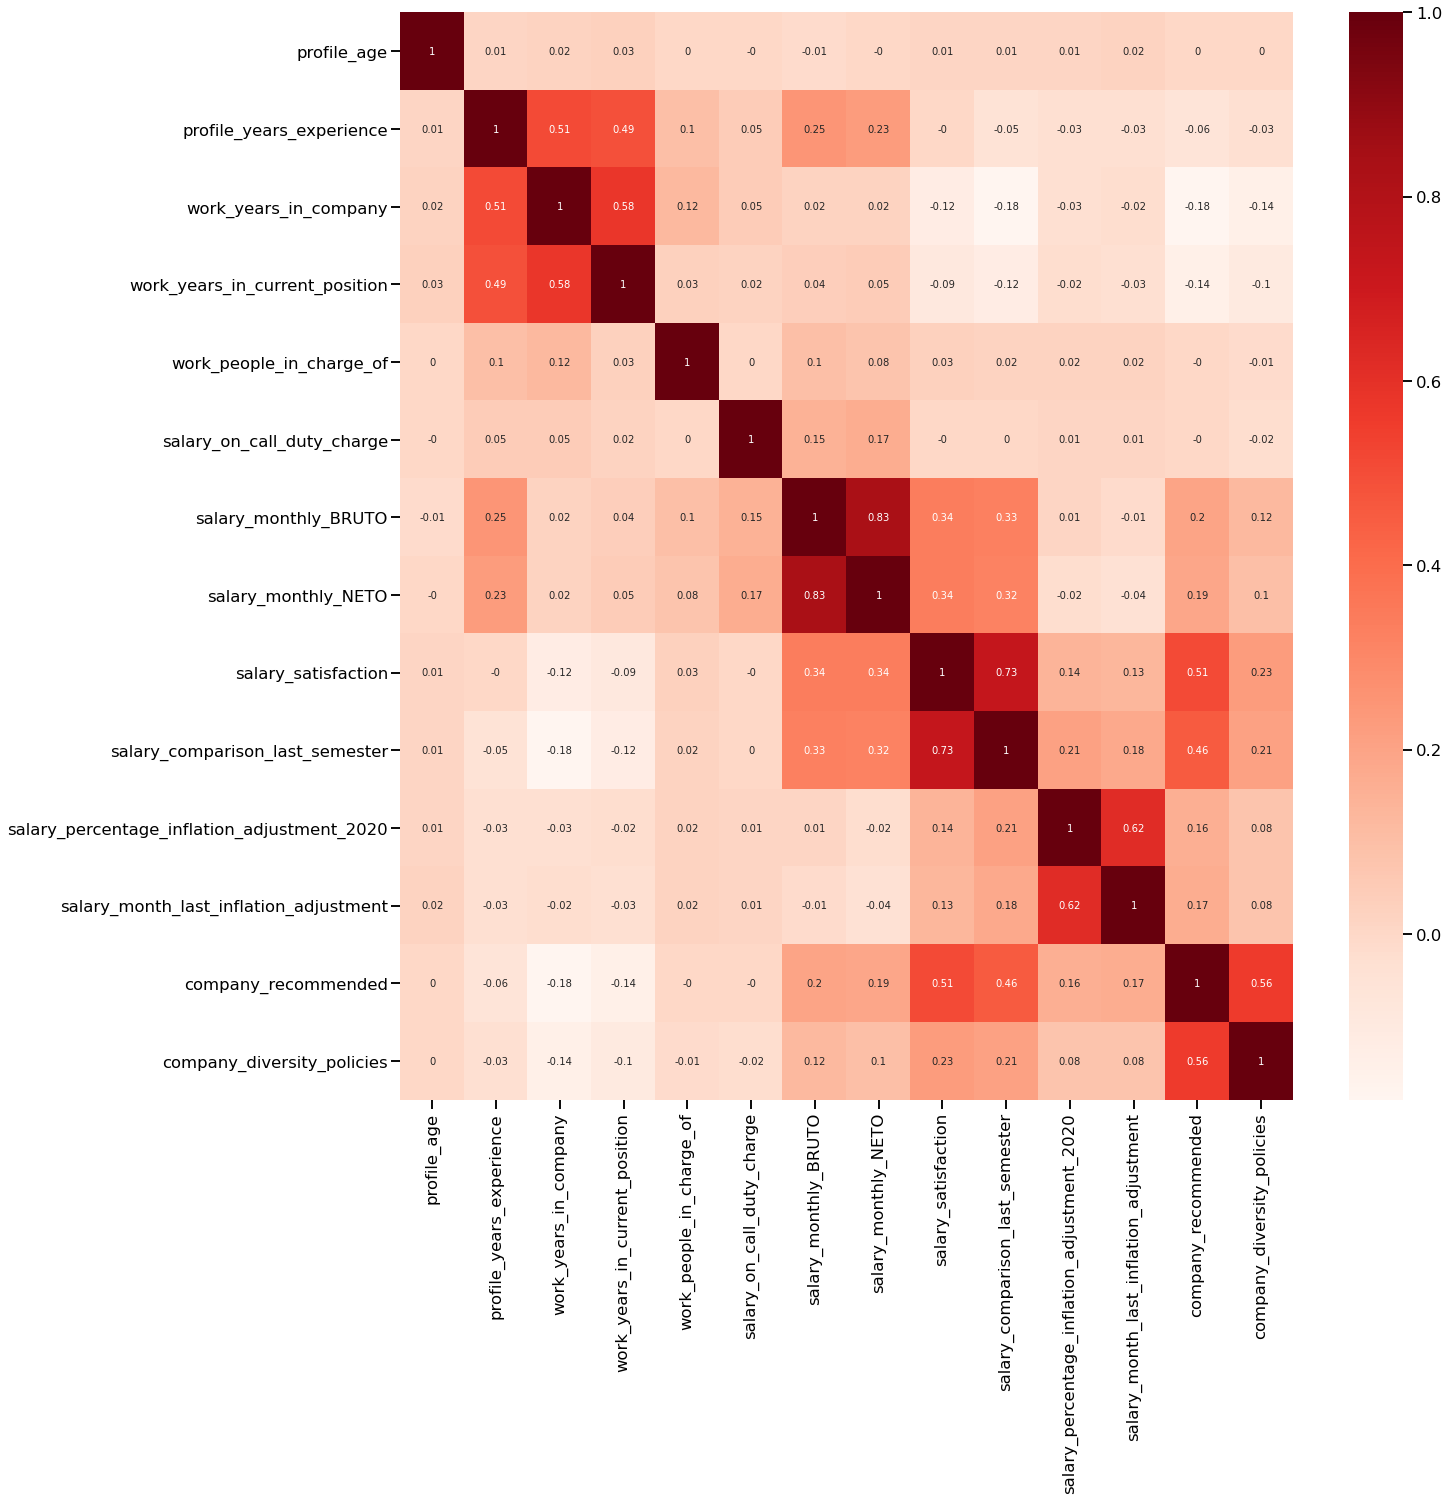

In [7]:
correlations = df.corr().round(2)

#Using Pearson Correlation
plt.figure(figsize=(20,20))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

De lo anterior se desprende que hay una alta correralación entre el salario bruto y el neto lo cual nos permite omitir alguna de las dos columnas

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

<span style='background:#e6b530'> Limpieza de datos  </span>


Identificamos las columnas que tienen faltantes de datos y las mangintudes de los faltantes

In [8]:
df.isna().sum()

profile_gender                                     0
profile_age                                        0
work_country                                       0
work_province                                      0
profile_years_experience                           0
work_years_in_company                              0
work_years_in_current_position                     0
work_people_in_charge_of                           0
profile_studies_level                              0
profile_studies_level_state                        0
profile_career                                   299
profile_university                               534
profile_specialization_courses                     0
profile_open_source_contributions                  0
profile_programming_as_hobby                       0
work_role                                          0
tools_platform                                     2
tools_programming_languages                        1
tools_frameworks                              

<span style='background:black'>Se detecta que existen  filas  las cuales tienen el campo salary_monthly_NETO sin información (212 filas en esta condición)</span>

In [9]:
cantidad_salary_monthly_NETO_nulos = df.salary_monthly_NETO.isna().sum()
cantidad_filas_df = df.shape[0]
print (" Total de filas df: {0}, total de filas donde salary_monthly_NETO no tiene valoes: {1} , % {2} ".format(cantidad_filas_df, cantidad_salary_monthly_NETO_nulos ,   cantidad_salary_monthly_NETO_nulos / cantidad_filas_df * 100 ))

 Total de filas df: 6095, total de filas donde salary_monthly_NETO no tiene valoes: 212 , % 3.4782608695652173 



En el data set se encontro 'Ninguno' como lenguaje de programación. 
Eliminamos las filas que tienen como lenguaje a 'Ninguno'

In [10]:
df = df[df['tools_programming_languages'] != 'Ninguno']

In [11]:
# Obtenemos todos los roles informados
df['work_role'].unique()

array(['Developer', 'SysAdmin / DevOps / SRE', 'Manager / Director',
       'Technical Leader', 'Data Scientist / Data Engineer', 'DBA',
       'QA / Tester', 'Architect', 'Product Manager', 'Designer',
       'BI Analyst / Data Analyst', 'Middleware', 'VP / C-Level',
       'Storage / Backup', 'Infosec', 'HelpDesk', 'Networking',
       'Jefe de infraestructura ', 'Scrum Master', 'Project Manager',
       'Consultant', 'Business Analyst', 'Team leader',
       'Microinformatica', 'Technical Writer',
       'Implementadora de software ', 'Desarrollador BI',
       'Martech Specialist', 'Software Configuration Management',
       'Maquetador/Diseño UI', 'Service manager', 'Release Manager',
       'Access Management Analyst', 'DevOps Cloud Engineer', 'tecnico',
       'Recruiter / HR', 'Data Visualization',
       'Implementador de Software', 'back end', 'Software Engineer',
       'NLP', 'NOC', 'QA automation Technical Leader', 'SOC', 'Cto',
       'Instalación, puesta en marcha y serv

In [12]:
# Se puede observar que existen roles que no hacen desarrollo. Como lo que se busca
# es cuales son los lenguajes mejores pagos, se asume que se apunta a roles 
# vincualados al desarrollo / calidad / devops y NO a roles de gestión, RRHH

# Vamos a elimiar todos los roles que tenga un string que contenga:
# Manager, Product Owner,, Administrativo, Construcción y atendedor , 
# Repartido, Responsable, Coordinador, Encargado, Empleado bancario, Gerente, biomedicina, Jefe, Executive, Project Lead, Gastronomía


result = df['work_role'].str.contains('Scrum Master|Manager|Product Owner|Administrativ|Repartidor|Responsable|Dirección|oordinador|Encargado|bancario|biomedicina|Coach|Jefe|jefe|Executive|Resiliencia|Gastronomía|Project|Maxirest|cadete|director|Finance|Cto|Writer|VP' )

#~result

df[result]['work_role'].count()


550

In [13]:
#Controlamos que las filas se hayan elimandos del data frame. Para eso
# verificamos que el tamñano del data frame resultante sea menor al df
# original
df = df[~result ]
df.shape

(5219, 48)

In [14]:
df['work_contract_type'].unique()

array(['Full-Time', 'Freelance', 'Part-Time',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Remoto (empresa de otro país)'], dtype=object)

In [17]:
#Buscamos y calculmanos la cantidad de filas tipo part-time
partime_index = df['work_contract_type'].str.contains('Part-Time')
partime_index.sum()

0

In [18]:
#Eliminamos los part-time puesto que no sabe si el partime es medio dia, 2 horas, 3 horas ....
df = df[~partime_index ]
df.shape

(4930, 48)

**Corregimos** las filas que no tiene **salario NETO**. Para ello tomamos el bruto y lo multiplicamos x 0,83

In [19]:
#Para las filas que no tienen neto, calculamos el neto haciendo BRUTO * 0.83
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if math.isnan(x.salary_monthly_NETO)   else x['salary_monthly_NETO'], axis=1)    

Controlamos que no existan más filas con NETO sin valores (debe ser 0 la cantidad de filas que no tienen salario neto)

In [20]:
df['salary_monthly_NETO'].isna().sum()

0

Vemos cuantos casos tenemos de salarios Netos mayores a salarios Brutos

In [22]:
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

122

Vamos a poner como bruto al neto, y luego recalculamos en neto (no se contempla descuento de ganancias, descontamos un 17% entre jub, obra soc y otros).

In [23]:
df['recalculate_salary'] = df.apply(lambda x:  x['salary_monthly_NETO'] >  x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_NETO'] if x['recalculate_salary']   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if x['recalculate_salary']   else x['salary_monthly_NETO'], axis=1)    

<span style='background:black'>Verificamos que no existan mas salarios netos matores a salarios brutos </span>

In [25]:
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

0

<span style='background:black'>Muchos sueldos están expresados en unidades de mil. Por ejemplo para 82000, ponen 82. Vamos a convertir esos sueldos al formato del resto </span>
<span style='background:black'>Normalizamos el formato de los sueldos a unidades de mil (82 --> 82000) </span>

In [26]:
filtro_dolar = 'Mi sueldo está dolarizado'
#Filtrar que no sean en dolares
us_limit = 10000
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * us_limit if ((x['salary_monthly_BRUTO'] < us_limit) & (x['salary_monthly_BRUTO'] == filtro_dolar ) )  else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_NETO'] * us_limit if ((x['salary_monthly_NETO'] < us_limit ) & (x['salary_monthly_BRUTO'] == filtro_dolar ) )  else x['salary_monthly_NETO'], axis=1)

In [33]:
df_salary_to_convert = ((df.salary_monthly_NETO <= us_limit) & (df.salary_in_usd == filtro_dolar) )

print(f"Cantidad de salarios <= {us_limit} :  {df_salary_to_convert.sum()} ,  porcentaje respecto al total % {(df_salary_to_convert.sum()  / df.shape[0]).round(2) }")

Cantidad de salarios <= 10000 :  25 ,  porcentaje respecto al total % 0.01


In [34]:
df[df_salary_to_convert][['salary_monthly_NETO','salary_in_usd']]

,salary_monthly_NETO,salary_in_usd
224,5000.0,Mi sueldo está dolarizado
246,60.0,Mi sueldo está dolarizado
844,110.0,Mi sueldo está dolarizado
910,160.0,Mi sueldo está dolarizado
924,6000.0,Mi sueldo está dolarizado
982,185.0,Mi sueldo está dolarizado
1425,260.0,Mi sueldo está dolarizado
1701,307.1,Mi sueldo está dolarizado
1820,145.0,Mi sueldo está dolarizado
2212,125.0,Mi sueldo está dolarizado


<span style='background:black'>
Convertimos a $ los sueldos dolarizados. Tomamos como fuente el valor blue reportado en https://www.cotizacion-dolar.com.ar/dolar-blue-historico-2020.php . Se toma fecha 25/08/2020, valor compra
</span>

In [40]:
valor_dolar = 133

df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * valor_dolar if (( x['salary_monthly_BRUTO']  < us_limit) & (x['salary_in_usd'] == filtro_dolar ))   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO']  = df.apply(lambda x: x['salary_monthly_NETO']  * valor_dolar if (( x['salary_monthly_NETO']  < us_limit) & (x['salary_in_usd'] == filtro_dolar ))  else x['salary_monthly_NETO'], axis=1)

In [43]:
print(f"Cantidad de salarios <= {us_limit} : {((df.salary_monthly_BRUTO <= us_limit) &  (df.salary_in_usd == filtro_dolar)).sum().round(2)}, % respecto al total {(df_salary_to_convert.sum()  / df.shape[0]).round(2) }")

Cantidad de salarios <= 10000 : 0, % respecto al total 0.01


Eliminamos los salarios que estan por debajo de 10000, por ser salarios 'sospechosos'. No son dolarizados, no estan expresados en unidades de miles.

In [46]:
index_to_drop = df[df.salary_monthly_NETO <= us_limit].index
df.drop(index_to_drop, inplace = True)

In [49]:
print(f"Cantidad de salarios <= {us_limit} : {(df.salary_monthly_NETO <= 10000).sum()}, porcentaje respecto al total {(df.salary_monthly_NETO <= us_limit).sum()  / df.shape[0] }")

Cantidad de salarios <= 10000 : 0, porcentaje respecto al total 0.0


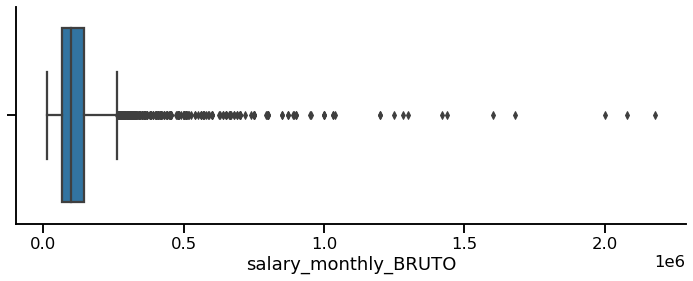

In [50]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df['salary_monthly_BRUTO'])
seaborn.despine()

In [53]:
# Hacemos una consulta agrupando sueldos por work_role, creemos que el work_role es una propiedad
# que influye en el salario. Por ejemplo, un lider técnico gana más que un developer
df_lang_clean_group_by_programming_language = df.groupby(['work_role'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
df_lang_clean_group_by_programming_language

work_role salary_monthly_BRUTO  \
                                                                       mean   
0                                   buyer / commercial            140000.00   
1                                                    ,             40000.00   
2                        AV Technical Leader - Support             80300.00   
3                            Access Management Analyst             52400.00   
4                                                Admin             35000.00   
..                                                 ...                  ...   
225                                  technical analyst             60000.00   
226                                            tecnico             20000.00   
227                                todos los de arriba            180000.00   
228  trabajo como desarrollador back, pero también ...             66714.38   
229                                  técnico reparador             43500.00   

                                 
           min        max count  
0    140000.00  140000.00     1  
1     40000.00   40000.00     1  
2     80300.00   80300.00     1  
3     52400.00   52400.00     1  
4     35000.00   35000.00     1  
..         ...        ...   ...  
225   60000.00   60000.00     1  
226   20000.00   20000.00     1  
227  180000.00  180000.00     1  
228   66714.38   66714.38     1  
229   43500.00   43500.00     1  

[230 rows x 5 columns]

In [56]:
# Ordenamos la agrupación de work_role por cantidades. Se puede observar que el rol Developer es el más común
df_lang_clean_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:30]

work_role salary_monthly_BRUTO                       \
                                                    mean       min        max   
59                        Developer        126777.195344   17000.0  2180000.0   
180         SysAdmin / DevOps / SRE        131178.631862   25000.0  1680000.0   
188                Technical Leader        198400.344059   17000.0  2080000.0   
136                     QA / Tester        105379.597545   25000.0  1033000.0   
26                        Architect        196997.692771   11970.0  1439100.0   
80                         HelpDesk         63173.352789   14000.0   508252.0   
50   Data Scientist / Data Engineer        163330.423077   23000.0  1200000.0   
32        BI Analyst / Data Analyst         95133.781360   21700.0   271802.0   
42                       Consultant        100868.535254   25000.0   700000.0   
119                      Networking        100947.698611   30000.0  1200000.0   
35                 Business Analyst         99971.726915   40000.0   250000.0   
201                              UX         98306.304348   35000.0   392000.0   
93                          Infosec        125442.611940   43930.0   312100.0   
46                              DBA        164170.020000   26000.0  1250000.0   
55                         Designer         65941.540541   13300.0   190000.0   
143                  Recruiter / HR         98555.718750   35900.0   200000.0   
112                      Middleware        117280.952381   36000.0   210000.0   
148               Sales / Pre-Sales        176421.052632   33000.0  1000000.0   
178                Storage / Backup         96222.222222   57000.0   145000.0   
116                             NLP        100233.000000   77000.0   118337.0   
167               Software Engineer        171000.000000  122000.0   250000.0   
9                Analista Funcional         75525.000000   45000.0   101000.0   
71               Functional Analyst         99333.333333   60000.0   133000.0   
56                           DevOps        195666.666667   85000.0   325000.0   
40                   Cloud Engineer        107500.000000  100000.0   115000.0   
70                        Funcional         65500.000000   55000.0    76000.0   
34                  Blockchain Team        137000.000000  137000.0   137000.0   
17               Analista funcional         64500.000000   45000.0    84000.0   
29                          Auditor         87500.000000   65000.0   110000.0   
169               Software engineer         93800.000000   75000.0   112600.0   

           
    count  
59   2165  
180   596  
188   372  
136   220  
26    166  
80    147  
50    130  
32    125  
42    118  
119   108  
35     94  
201    69  
93     67  
46     50  
55     37  
143    32  
112    21  
148    19  
178     9  
116     6  
167     5  
9       4  
71      3  
56      3  
40      2  
70      2  
34      2  
17      2  
29      2  
169     2

In [57]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO' ,'salary_monthly_BRUTO', 'work_role']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [61]:
df.tools_programming_languages[:3]

1                             HTML, Javascript, Python
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
Name: tools_programming_languages, dtype: object

Eliminamos las filas que  estan fuera de la franja hetaria para trabajar. Dejamos los filas que se encuentre entre 18 y 65

In [63]:
edad_limite_inferior = 18
edad_limite_superior = 65

rows_to_delete = df[(df.profile_age <= edad_limite_inferior) | (df.profile_age >= edad_limite_superior ) ].index
df_age_cleaned = df.drop(rows_to_delete)

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

Filtrando por edad:

Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es tools_programming_languages. Sus valores son strings con los lenguajes seleccionados separados por comas.

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.


In [64]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 



In [66]:
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.

def duplicate_rows(df, relevant_columns):

    df_lang = df.cured_programming_languages\
        .apply(pd.Series).stack()\
        .reset_index(level=-1, drop=True).to_frame()\
        .join(df[relevant_columns])\
        .rename(columns={0: 'programming_language'})
    # Horrible programming style! But a lot of data science code can be written with
    # as concatenations of functions (pipelines), and there's no elegant way of
    # doing that on Python.
    
    return df_lang


Generamos dos data frames
- df_lang: Trabajamos en la parte 1 del entregable
- df_lang_part_2: Trabajamos en la parte 2 del entregable
En este punto ambos dataframes tienen las mismas filas

In [67]:
df_lang = duplicate_rows(df, relevant_columns)
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


In [69]:
cloumns_part_2 = relevant_columns + ['profile_studies_level_state','profile_studies_level', 'profile_years_experience', 'work_years_in_company' , 'work_years_in_current_position' , 'work_people_in_charge_of' , 'profile_gender' , 'salary_percentage_inflation_adjustment_2020' ]

df_lang_part_2 = duplicate_rows(df, cloumns_part_2)
df_lang_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [75]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2125
1,sql,1787
2,html,1549
3,python,1237
4,java,1199
5,css,1069
6,bash/shell,861
7,php,691
8,typescript,688
9,.net,672


Calculamos que % tiene cada lenguaje respecto al total del lenguaje

In [80]:
total_lenguajes = language_count['frequency'].sum()
language_count['porc'] = ((language_count['frequency'] / total_lenguajes).round(4)) * 100
language_count

,language,frequency,porc
0,javascript,2125,14.41
1,sql,1787,12.12
2,html,1549,10.51
3,python,1237,8.39
4,java,1199,8.13
...,...,...,...
183,elm,1,0.01
184,qlik,1,0.01
185,powerscript,1,0.01
186,powersheell,1,0.01


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [86]:
# Buscamos los lenguajes que formen el 90% de las muestras

index = 1 
porc_target = 95
while language_count[:index]['porc'].sum()  <= porc_target:
    print(" Indice :" , index , " Total %" ,  language_count[:index]['porc'].sum() , end = "")
    index = index + 1



 Indice : 1  Total % 14.41 Indice : 2  Total % 26.53 Indice : 3  Total % 37.04 Indice : 4  Total % 45.43 Indice : 5  Total % 53.56 Indice : 6  Total % 60.81 Indice : 7  Total % 66.65 Indice : 8  Total % 71.34 Indice : 9  Total % 76.01 Indice : 10  Total % 80.57000000000001 Indice : 11  Total % 84.76 Indice : 12  Total % 86.5 Indice : 13  Total % 87.89 Indice : 14  Total % 89.26 Indice : 15  Total % 90.54 Indice : 16  Total % 91.65 Indice : 17  Total % 92.61 Indice : 18  Total % 93.41 Indice : 19  Total % 94.08 Indice : 20  Total % 94.67999999999999


Indicar que se toman los lenguajes más representativos en base al punto de inflexión que se observa en el gráfico

 Hallazgo interesante: Tanto visualmente como porcentualmente, se llega a la misma 
conclusión que es tomar los 15 lenguajes más  frecuentes. 
El en gráfico se puede observar como a partir del lenguaje en la ubicación 20 (lenguaje R), la curva de frecuencias absolutas se 'desploma'

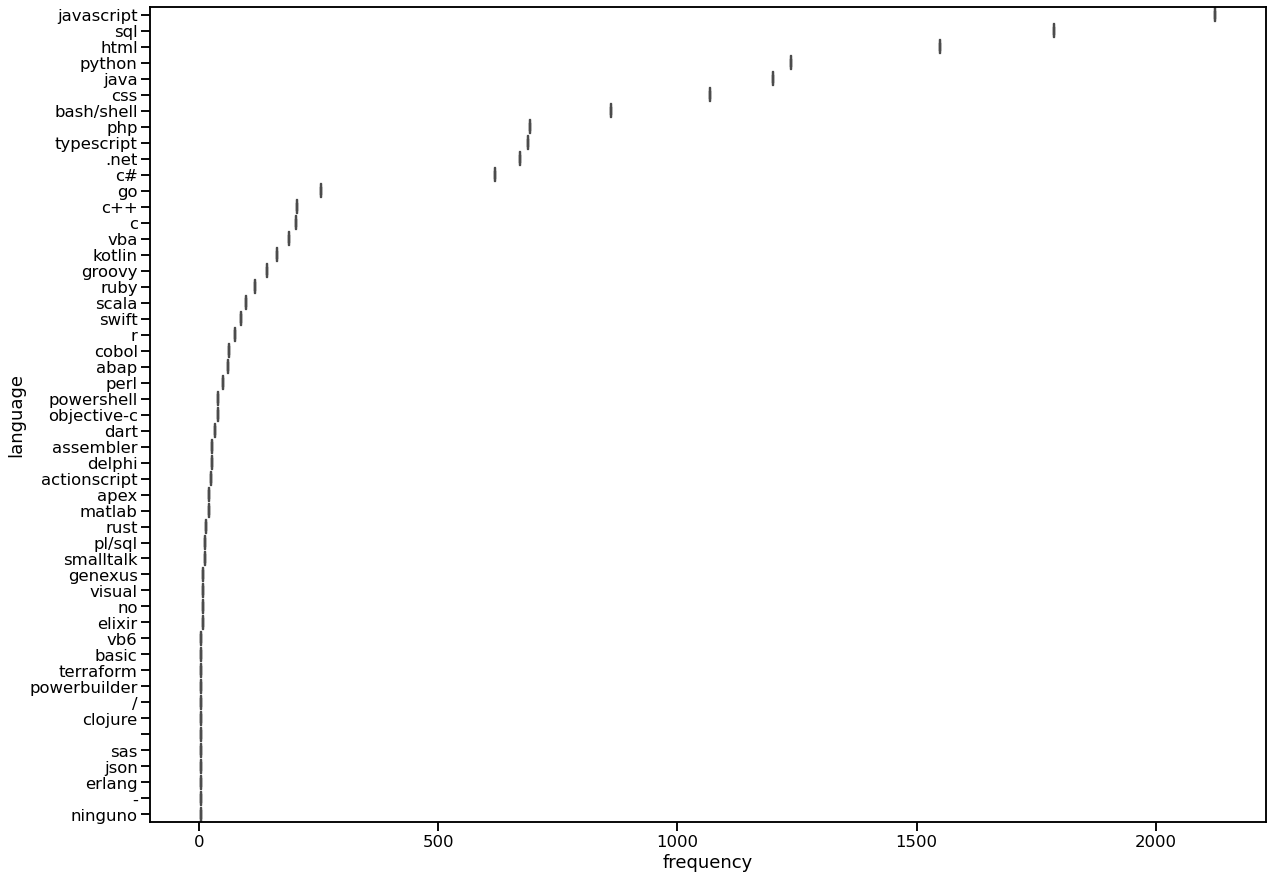

In [89]:
plt.figure(figsize=(20, 15))
over_limit = 30
seaborn.boxplot(data=language_count[:index], y=language_count.language[:index + over_limit], x=language_count.frequency,
                 color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [90]:
language_count[:index]

,language,frequency,porc
0,javascript,2125,14.41
1,sql,1787,12.12
2,html,1549,10.51
3,python,1237,8.39
4,java,1199,8.13
5,css,1069,7.25
6,bash/shell,861,5.84
7,php,691,4.69
8,typescript,688,4.67
9,.net,672,4.56


In [91]:
interesting_languages  =language_count[:index]['language'].values
interesting_languages

array(['javascript', 'sql', 'html', 'python', 'java', 'css', 'bash/shell',
       'php', 'typescript', '.net', 'c#', 'go', 'c++', 'c', 'vba',
       'kotlin', 'groovy', 'ruby', 'scala', 'swift', 'r'], dtype=object)

In [92]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#interesting_languages = ["python"]

def filter_intresting_languages(df_lang,intresting_languages):
    
    filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

    return filtered_df_lang

In [93]:
filtered_df_lang = filter_intresting_languages(df_lang,interesting_languages)
filtered_df_lang[:5]


,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


In [95]:
#Este data frame se prepara para la parte el Ejercicio 2
filtered_df_lang_part_2 = filter_intresting_languages(df_lang_part_2,interesting_languages)
filtered_df_lang_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0


Sacando las métricas útiles para esta distribución:

In [96]:
#Media general
df_means =df_lang.groupby(['programming_language']).agg({'salary_monthly_BRUTO': ['mean']}).reset_index()
#dejamos solo 2 decimales
df_means.describe().round(2)

,salary_monthly_BRUTO
,mean
count,188.00
mean,128393.86
std,99842.57
min,12000.00
25%,77750.00
50%,106800.50
75%,139125.00
max,720000.00


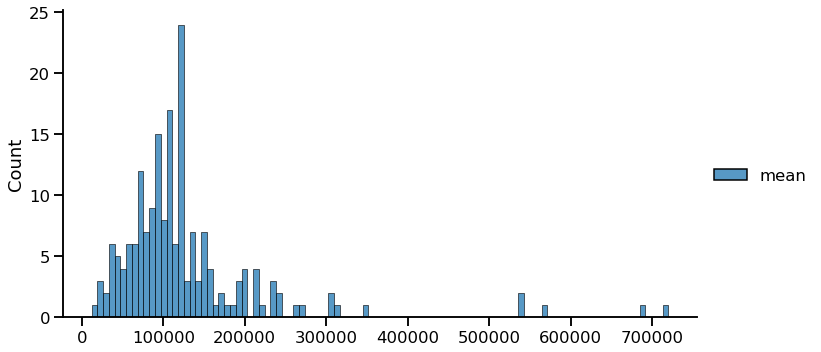

In [97]:
#tamaño de bins = # de barritas
seaborn.displot(df_means['salary_monthly_BRUTO'], aspect=2, bins = 100)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')


In [104]:
# Se crea un dataframe agrupado por 'programming_language' y luego se visualiza por diferentes criterios de orden
filtered_df_lang_group_by_programming_language = filtered_df_lang.groupby(['programming_language'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
filtered_df_lang_group_by_programming_language

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
0                  .net        119201.820074  17000.0  1033000.0   672
1            bash/shell        151782.937805  17000.0  2080000.0   861
2                     c        152280.206733  11970.0  2080000.0   202
3                    c#        120384.308948  12000.0  1680000.0   618
4                   c++        138337.191512  11970.0  1680000.0   205
5                   css        122794.197081  13300.0  2080000.0  1069
6                    go        198974.932500  40000.0  1600000.0   256
7                groovy        153059.449577  22610.0   440000.0   142
8                  html        121947.781407  13300.0  2080000.0  1549
9                  java        136098.123119  11970.0  2180000.0  1199
10           javascript        134410.403995  13300.0  2180000.0  2125
11               kotlin        188745.657012  11970.0  2180000.0   164
12                  php        119468.364067  11970.0   798000.0   691
13               python        147169.735352  17000.0  1680000.0  1237
14                    r        154621.021579  35900.0  1000000.0    76
15                 ruby        235993.745847  30000.0  2080000.0   118
16                scala        220589.797980  11970.0  1000000.0    99
17                  sql        123227.817711  20000.0  2180000.0  1787
18                swift        211416.363636  50000.0  2000000.0    88
19           typescript        154638.982238  17000.0  2180000.0   688
20                  vba        102829.005661  26890.0   750000.0   189

In [105]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
10           javascript        134410.403995  13300.0  2180000.0  2125
17                  sql        123227.817711  20000.0  2180000.0  1787
8                  html        121947.781407  13300.0  2080000.0  1549
13               python        147169.735352  17000.0  1680000.0  1237
9                  java        136098.123119  11970.0  2180000.0  1199
5                   css        122794.197081  13300.0  2080000.0  1069
1            bash/shell        151782.937805  17000.0  2080000.0   861
12                  php        119468.364067  11970.0   798000.0   691
19           typescript        154638.982238  17000.0  2180000.0   688
0                  .net        119201.820074  17000.0  1033000.0   672
3                    c#        120384.308948  12000.0  1680000.0   618
6                    go        198974.932500  40000.0  1600000.0   256
4                   c++        138337.191512  11970.0  1680000.0   205
2                     c        152280.206733  11970.0  2080000.0   202
20                  vba        102829.005661  26890.0   750000.0   189
11               kotlin        188745.657012  11970.0  2180000.0   164
7                groovy        153059.449577  22610.0   440000.0   142
15                 ruby        235993.745847  30000.0  2080000.0   118
16                scala        220589.797980  11970.0  1000000.0    99
18                swift        211416.363636  50000.0  2000000.0    88
14                    r        154621.021579  35900.0  1000000.0    76

In [106]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'mean')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
15                 ruby        235993.745847  30000.0  2080000.0   118
16                scala        220589.797980  11970.0  1000000.0    99
18                swift        211416.363636  50000.0  2000000.0    88
6                    go        198974.932500  40000.0  1600000.0   256
11               kotlin        188745.657012  11970.0  2180000.0   164
19           typescript        154638.982238  17000.0  2180000.0   688
14                    r        154621.021579  35900.0  1000000.0    76
7                groovy        153059.449577  22610.0   440000.0   142
2                     c        152280.206733  11970.0  2080000.0   202
1            bash/shell        151782.937805  17000.0  2080000.0   861
13               python        147169.735352  17000.0  1680000.0  1237
4                   c++        138337.191512  11970.0  1680000.0   205
9                  java        136098.123119  11970.0  2180000.0  1199
10           javascript        134410.403995  13300.0  2180000.0  2125
17                  sql        123227.817711  20000.0  2180000.0  1787
5                   css        122794.197081  13300.0  2080000.0  1069
8                  html        121947.781407  13300.0  2080000.0  1549
3                    c#        120384.308948  12000.0  1680000.0   618
12                  php        119468.364067  11970.0   798000.0   691
0                  .net        119201.820074  17000.0  1033000.0   672
20                  vba        102829.005661  26890.0   750000.0   189

In [107]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'max')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
10           javascript        134410.403995  13300.0  2180000.0  2125
19           typescript        154638.982238  17000.0  2180000.0   688
9                  java        136098.123119  11970.0  2180000.0  1199
11               kotlin        188745.657012  11970.0  2180000.0   164
17                  sql        123227.817711  20000.0  2180000.0  1787
15                 ruby        235993.745847  30000.0  2080000.0   118
2                     c        152280.206733  11970.0  2080000.0   202
5                   css        122794.197081  13300.0  2080000.0  1069
8                  html        121947.781407  13300.0  2080000.0  1549
1            bash/shell        151782.937805  17000.0  2080000.0   861
18                swift        211416.363636  50000.0  2000000.0    88
3                    c#        120384.308948  12000.0  1680000.0   618
4                   c++        138337.191512  11970.0  1680000.0   205
13               python        147169.735352  17000.0  1680000.0  1237
6                    go        198974.932500  40000.0  1600000.0   256
0                  .net        119201.820074  17000.0  1033000.0   672
16                scala        220589.797980  11970.0  1000000.0    99
14                    r        154621.021579  35900.0  1000000.0    76
12                  php        119468.364067  11970.0   798000.0   691
20                  vba        102829.005661  26890.0   750000.0   189
7                groovy        153059.449577  22610.0   440000.0   142

In [109]:
#Esta funcion devuelve 3 dataframes 
# outliers_inferiores: Son los valores que perforan el limiter inferior 
# filtered: Son los valores que quedan dentro del rango RIC
# outliers_superiores: Son los valores que perforan el limiete superior

def remove_outliers (laguange,filtered_df_lang): 
    
    result = filtered_df_lang[filtered_df_lang.programming_language == laguange]['salary_monthly_BRUTO'].describe()
    RIC = result[6] - result[4]
    Ls = result[6] + RIC * 1.5
    Li = result[4] - RIC * 1.5

    filtered = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO <= Ls) &  (filtered_df_lang.salary_monthly_BRUTO >= Li) ] 
    outliers_superiores = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO >= Ls)] 
    outliers_inferiores = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO <= Li)] 
    
    #print ("Language: {0} RIC {1} Ls {2} Li {3}".format(laguange,RIC,Ls,Li))
    return (outliers_inferiores,filtered,outliers_inferiores)

In [110]:
# Esta funcion crea un data frame con todos los leguajes especificados en interesting_languages
# en el data frame filtered_df_lang. El nuevo data frame generado, tiene eliminados los outliers inferiores y superiores


def create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang):
    filtered_data_frames = []

    for language in interesting_languages:
        _,tmp,_ = remove_outliers (language, filtered_df_lang)
        filtered_data_frames.append(tmp)

    tmp = pd.concat(filtered_data_frames, axis=0)
    
    return tmp


In [111]:
df_no_outliers_interesting_languages = create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang)

In [112]:
# Este dataframe se prepara para el Ejercicio 2
df_no_outliers_interesting_languages_part_2 = create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang_part_2)

In [113]:
df_no_outliers_interesting_languages.shape[0]

13051

In [114]:
df_no_outliers_interesting_languages.describe()

,salary_monthly_NETO,salary_monthly_BRUTO
count,1.305100e+04,13051.000000
mean,8.560974e+04,109542.434494
std,4.522615e+04,55639.485194
min,1.070000e+04,11970.000000
25%,5.644000e+04,67350.000000
50%,8.000000e+04,100000.000000
75%,1.050000e+05,140000.000000
max,1.061340e+06,500000.000000


<AxesSubplot:xlabel='salary_monthly_BRUTO', ylabel='Count'>

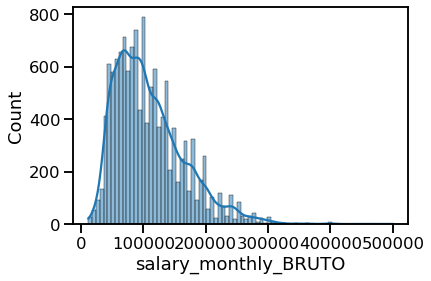

In [115]:
seaborn.histplot(df_no_outliers_interesting_languages['salary_monthly_BRUTO'] , kde=True)

In [116]:
df_no_outliers_interesting_languages_group_by_programming_language = df_no_outliers_interesting_languages.groupby(['programming_language'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
df_no_outliers_interesting_languages_group_by_programming_language

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
0                  .net        100446.946260  17000.0  234000.0   631
1            bash/shell        120068.243095  17000.0  303689.0   798
2                     c        110091.901405  11970.0  300000.0   185
3                    c#         98141.034661  12000.0  230000.0   575
4                   c++         98585.767340  11970.0  268400.0   188
5                   css         96831.528970  13300.0  246000.0   990
6                    go        157228.713074  40000.0  345000.0   231
7                groovy        144287.896642  22610.0  350000.0   137
8                  html         96510.308188  13300.0  242000.0  1429
9                  java        120052.850714  11970.0  297000.0  1148
10           javascript        106038.192185  13300.0  270000.0  1959
11               kotlin        153775.723856  11970.0  360000.0   153
12                  php         95206.610787  11970.0  240000.0   635
13               python        121138.257539  17000.0  303689.0  1150
14                    r        119359.966286  35900.0  300541.0    70
15                 ruby        169012.355234  30000.0  500000.0   107
16                scala        178388.901099  11970.0  342500.0    91
17                  sql        101660.433133  20000.0  250000.0  1682
18                swift        157440.000000  50000.0  400500.0    81
19           typescript        116853.080603  17000.0  300000.0   630
20                  vba         90429.182707  26890.0  200000.0   181

In [117]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:]

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
10           javascript        106038.192185  13300.0  270000.0  1959
17                  sql        101660.433133  20000.0  250000.0  1682
8                  html         96510.308188  13300.0  242000.0  1429
13               python        121138.257539  17000.0  303689.0  1150
9                  java        120052.850714  11970.0  297000.0  1148
5                   css         96831.528970  13300.0  246000.0   990
1            bash/shell        120068.243095  17000.0  303689.0   798
12                  php         95206.610787  11970.0  240000.0   635
0                  .net        100446.946260  17000.0  234000.0   631
19           typescript        116853.080603  17000.0  300000.0   630
3                    c#         98141.034661  12000.0  230000.0   575
6                    go        157228.713074  40000.0  345000.0   231
4                   c++         98585.767340  11970.0  268400.0   188
2                     c        110091.901405  11970.0  300000.0   185
20                  vba         90429.182707  26890.0  200000.0   181
11               kotlin        153775.723856  11970.0  360000.0   153
7                groovy        144287.896642  22610.0  350000.0   137
15                 ruby        169012.355234  30000.0  500000.0   107
16                scala        178388.901099  11970.0  342500.0    91
18                swift        157440.000000  50000.0  400500.0    81
14                    r        119359.966286  35900.0  300541.0    70

In [118]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'mean')],ascending = False)[:]

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
16                scala        178388.901099  11970.0  342500.0    91
15                 ruby        169012.355234  30000.0  500000.0   107
18                swift        157440.000000  50000.0  400500.0    81
6                    go        157228.713074  40000.0  345000.0   231
11               kotlin        153775.723856  11970.0  360000.0   153
7                groovy        144287.896642  22610.0  350000.0   137
13               python        121138.257539  17000.0  303689.0  1150
1            bash/shell        120068.243095  17000.0  303689.0   798
9                  java        120052.850714  11970.0  297000.0  1148
14                    r        119359.966286  35900.0  300541.0    70
19           typescript        116853.080603  17000.0  300000.0   630
2                     c        110091.901405  11970.0  300000.0   185
10           javascript        106038.192185  13300.0  270000.0  1959
17                  sql        101660.433133  20000.0  250000.0  1682
0                  .net        100446.946260  17000.0  234000.0   631
4                   c++         98585.767340  11970.0  268400.0   188
3                    c#         98141.034661  12000.0  230000.0   575
5                   css         96831.528970  13300.0  246000.0   990
8                  html         96510.308188  13300.0  242000.0  1429
12                  php         95206.610787  11970.0  240000.0   635
20                  vba         90429.182707  26890.0  200000.0   181

In [121]:
df_no_outliers_interesting_languages_group_by_programming_language.columns = [''.join(col).strip() for col in df_no_outliers_interesting_languages_group_by_programming_language.columns.values]

df_no_outliers_interesting_languages_group_by_programming_language['porc'] = 100 * df_no_outliers_interesting_languages_group_by_programming_language['salary_monthly_BRUTOcount'] / df_no_outliers_interesting_languages_group_by_programming_language['salary_monthly_BRUTOcount'].sum()

df_no_outliers_interesting_languages_group_by_programming_language

,programming_language,salary_monthly_BRUTOmean,salary_monthly_BRUTOmin,salary_monthly_BRUTOmax,salary_monthly_BRUTOcount,proc,porc
0,.net,100446.946260,17000.0,234000.0,631,4.834879,4.834879
1,bash/shell,120068.243095,17000.0,303689.0,798,6.114474,6.114474
2,c,110091.901405,11970.0,300000.0,185,1.417516,1.417516
3,c#,98141.034661,12000.0,230000.0,575,4.405793,4.405793
4,c++,98585.767340,11970.0,268400.0,188,1.440503,1.440503
5,css,96831.528970,13300.0,246000.0,990,7.585626,7.585626
6,go,157228.713074,40000.0,345000.0,231,1.769979,1.769979
7,groovy,144287.896642,22610.0,350000.0,137,1.049728,1.049728
8,html,96510.308188,13300.0,242000.0,1429,10.949353,10.949353
9,java,120052.850714,11970.0,297000.0,1148,8.796261,8.796261


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


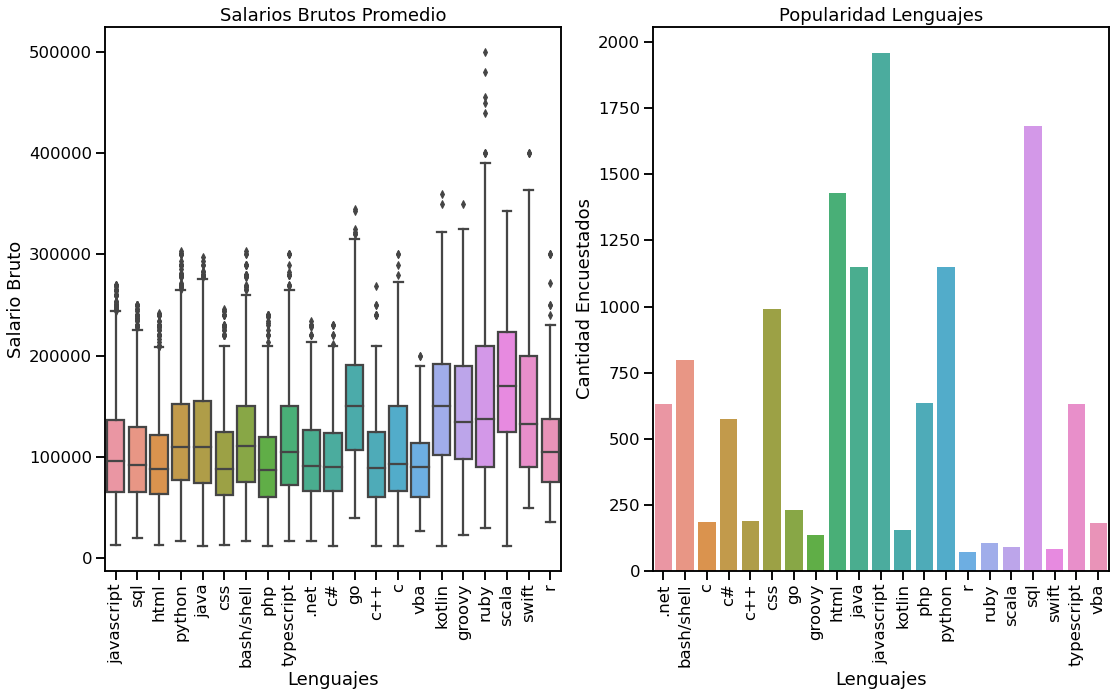

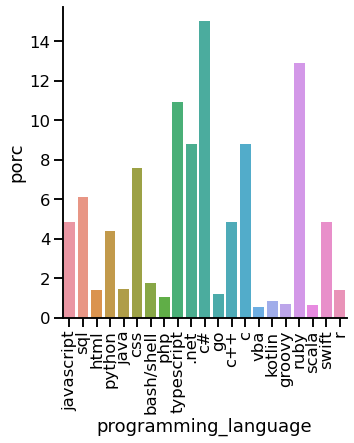

In [123]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))



seaborn.boxplot(ax = axes[0] , x="programming_language", y="salary_monthly_BRUTO", data=df_no_outliers_interesting_languages)
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_xlabel('Lenguajes')
axes[0].set_ylabel('Salario Bruto')
axes[0].set_title('Salarios Brutos Promedio')


seaborn.barplot(ax = axes[1] , x="programming_language", y="salary_monthly_BRUTOcount", data=df_no_outliers_interesting_languages_group_by_programming_language)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)
axes[1].set_xlabel('Lenguajes')
axes[1].set_ylabel('Cantidad Encuestados')
axes[1].set_title('Popularidad Lenguajes')




graph = seaborn.factorplot(ax = axes[0] , x ='programming_language', y ='porc', kind="bar", data = df_no_outliers_interesting_languages_group_by_programming_language)
graph.set_xticklabels(axes[0].get_xticklabels(),rotation=90)
#graph.set_xlabel('Lenguajes')
#graph.set_ylabel('Cantidad Encuestados')
#graph.set_title('Popularidad Lenguajes')

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [124]:
#Vamos a utilizar el data frame f_no_outliers_interesting_languages_part_2
df_no_outliers_interesting_languages_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,140000.0,Developer,"[css, html, javascript, sql, typescript]",En curso,Universitario,9.0,6.0,6.0,0,Hombre,0.0
5,javascript,"Java, Javascript",44000.0,54000.0,Developer,"[java, javascript]",Incompleto,Terciario,1.0,0.0,0.0,0,Hombre,15.0
6,javascript,Javascript,62400.0,75000.0,Developer,[javascript],Incompleto,Universitario,1.0,1.0,1.0,0,Hombre,8.0


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [125]:
#Distribucion y comportamiento
df_no_outliers_interesting_languages_part_2[:1]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0


In [127]:
scale_mapper = {"Primario":1, "Secundario":2, "Terciario":3 , "Universitario":4 , "Posgrado":5 , "Doctorado": 6  , "Posdoctorado" : 7  }
df_no_outliers_interesting_languages_part_2["profile_studies_level_ordinal"]  = df_no_outliers_interesting_languages_part_2["profile_studies_level"].replace(scale_mapper)

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, 0, 'javascript'),
 Text(1, 0, 'sql'),
 Text(2, 0, 'html'),
 Text(3, 0, 'python'),
 Text(4, 0, 'java'),
 Text(5, 0, 'css'),
 Text(6, 0, 'bash/shell'),
 Text(7, 0, 'php'),
 Text(8, 0, 'typescript'),
 Text(9, 0, '.net'),
 Text(10, 0, 'c#'),
 Text(11, 0, 'go'),
 Text(12, 0, 'c++'),
 Text(13, 0, 'c'),
 Text(14, 0, 'vba'),
 Text(15, 0, 'kotlin'),
 Text(16, 0, 'groovy'),
 Text(17, 0, 'ruby'),
 Text(18, 0, 'scala'),
 Text(19, 0, 'swift'),
 Text(20, 0, 'r')]

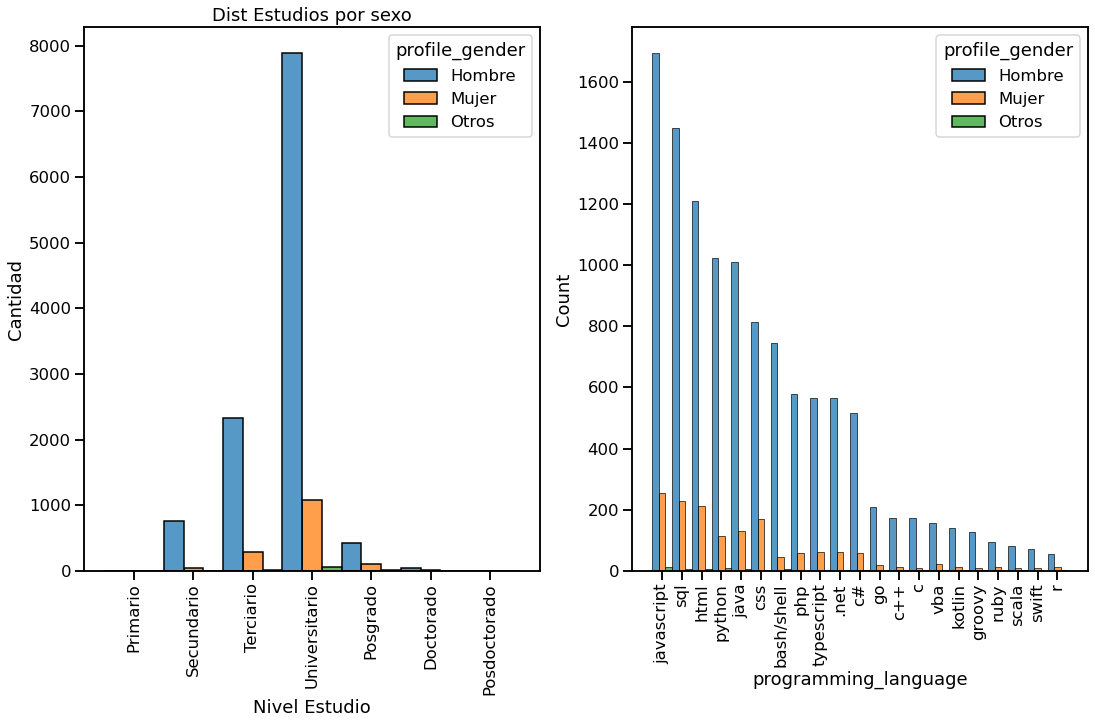

In [129]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.histplot(ax = axes[0], data = df_no_outliers_interesting_languages_part_2.sort_values(by=['profile_studies_level_ordinal']), x="profile_studies_level" , hue="profile_gender"  , multiple="dodge")

seaborn.histplot(ax = axes[1], data = df_no_outliers_interesting_languages_part_2, x="programming_language" , hue="profile_gender"  , multiple="dodge")

axes[0].set_title('Dist Estudios por sexo')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Nivel Estudio')


plt.draw()

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
#axes[0].legend(handles = axes[0].legend.handles() , title = 'Sexo')


axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)



Se puede ver que el nivel de estudios elevados de los hombres es mucho mas frecuente y también ka oresencia de las mujeres en la programación de los lengiuajes más populares

VER ESTO (porque parece que las proporciones cambian entre tipos de estudios)

<AxesSubplot:xlabel='salary_monthly_BRUTO', ylabel='salary_percentage_inflation_adjustment_2020'>

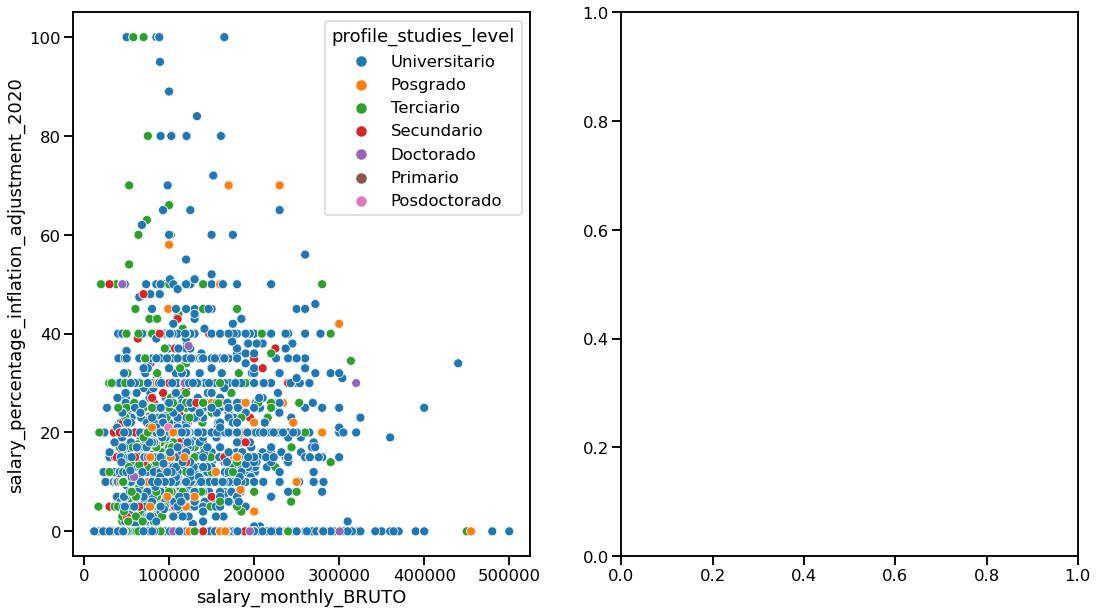

In [130]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_BRUTO", y="salary_percentage_inflation_adjustment_2020" , hue="profile_studies_level")

#seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_years_in_company" , hue="profile_studies_level")

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


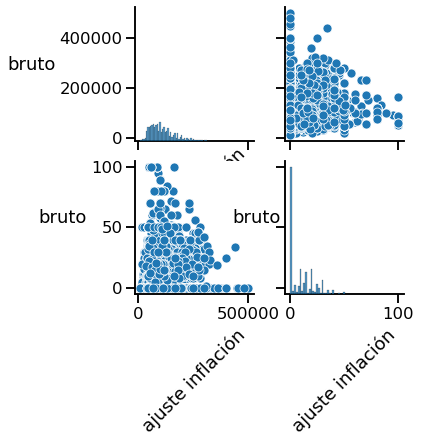

In [131]:
g = seaborn.pairplot(df_no_outliers_interesting_languages_part_2[[ 'salary_monthly_BRUTO', 'salary_percentage_inflation_adjustment_2020' ]])
for axes in g.axes.flat:
     #axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
     #axes.set_xlabel(axes.get_xlabel(), rotation=45)
     axes.set_ylabel("bruto", rotation=0, horizontalalignment='right')
     axes.set_xlabel("ajuste inflación", rotation=45)

In [132]:
df_no_outliers_interesting_languages_part_2[ 'salary_monthly_BRUTO'].corr(df_no_outliers_interesting_languages[ 'salary_monthly_NETO'])

0.8273693353421786

In [133]:
# De lo anterior se desprende que hay una alta correralación entre el salario bruto y el neto lo cual nos permite 
# omitir alguna de las dos columnas


## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [134]:
pob_terciario = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level']== 'Terciario']
pob_universitario = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level']== 'Universitario']


mean_ter = pob_terciario['salary_monthly_NETO'].mean()
median_ter = pob_terciario['salary_monthly_NETO'].median()
std_ter = pob_terciario['salary_monthly_NETO'].std()

mean_uni = pob_universitario['salary_monthly_BRUTO'].mean()
median_uni = pob_universitario['salary_monthly_BRUTO'].median()
std_uni = pob_universitario['salary_monthly_BRUTO'].std()

print ("Estudios Terciarios")
print (f" Media: {mean_ter} , Mediana: {median_ter} , Des: {std_ter} ")

print ("Estudios Universitarios")
print (f" Media: {mean_uni} , Mediana: {median_uni} , Des: {std_uni} ")


Estudios Terciarios
 Media: 78091.272784522 , Mediana: 72000.0 , Des: 37134.43355654878 
Estudios Universitarios
 Media: 111966.7453992016 , Mediana: 100000.0 , Des: 56350.4400837419 


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/covied

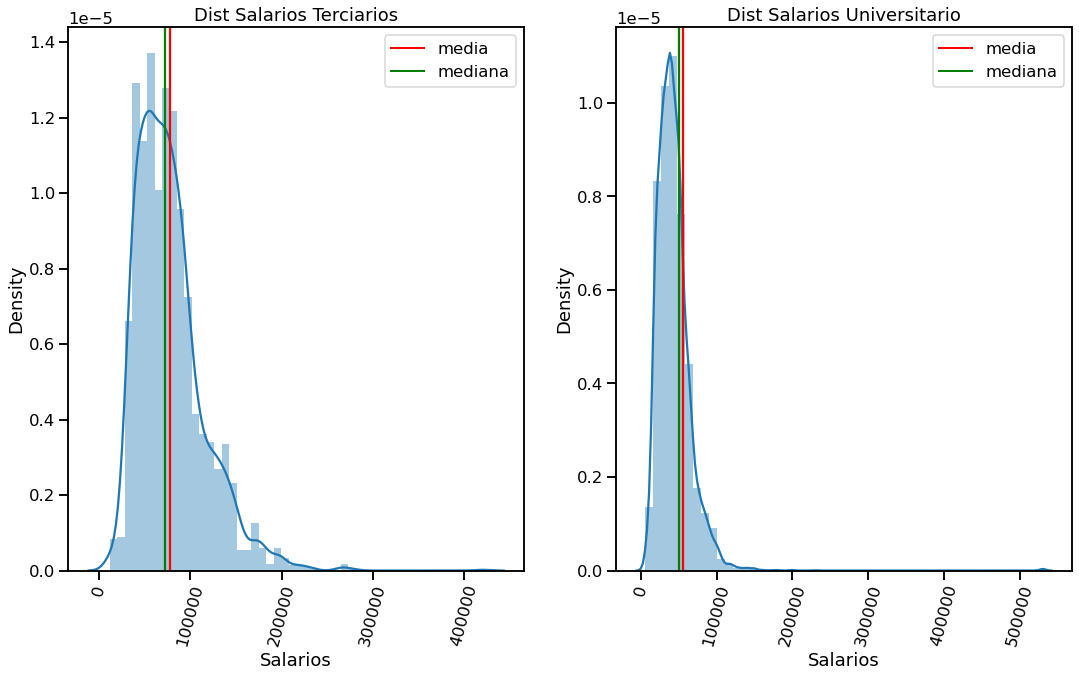

In [135]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.distplot(a = pob_terciario['salary_monthly_NETO'] ,ax = axes[0] )
seaborn.distplot(a = pob_universitario['salary_monthly_NETO'] ,ax = axes[1] )

plt.draw()

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=75)
axes[0].set_xlabel('Salarios')

axes[1].set_xticklabels(axes[0].get_xticklabels(),rotation=75)
axes[1].set_xlabel('Salarios')


#axes[0].set_ylabel('Salario Bruto')
axes[0].set_title('Dist Salarios Terciarios')
axes[0].axvline(mean_ter, color='r', linestyle='-')
axes[0].axvline(median_ter, color='g', linestyle='-')

axes[1].set_title('Dist Salarios Universitario')
axes[1].axvline(mean_uni, color='r', linestyle='-')
axes[1].axvline(median_uni, color='g', linestyle='-')




custom_lines = [Line2D([0], [0], color='red', lw=2),
            Line2D([0], [0], color='green', lw=2)]

axes[0].legend(custom_lines , ['media','mediana'])
axes[1].legend(custom_lines , ['media','mediana'])


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


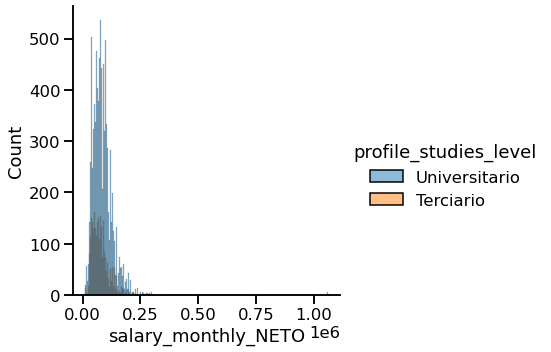

In [136]:


df_uni_ter = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level'].isin(['Universitario' , 'Terciario'])]


seaborn.displot(df_uni_ter , x='salary_monthly_NETO' , hue='profile_studies_level' ,ax = axes[0] )


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


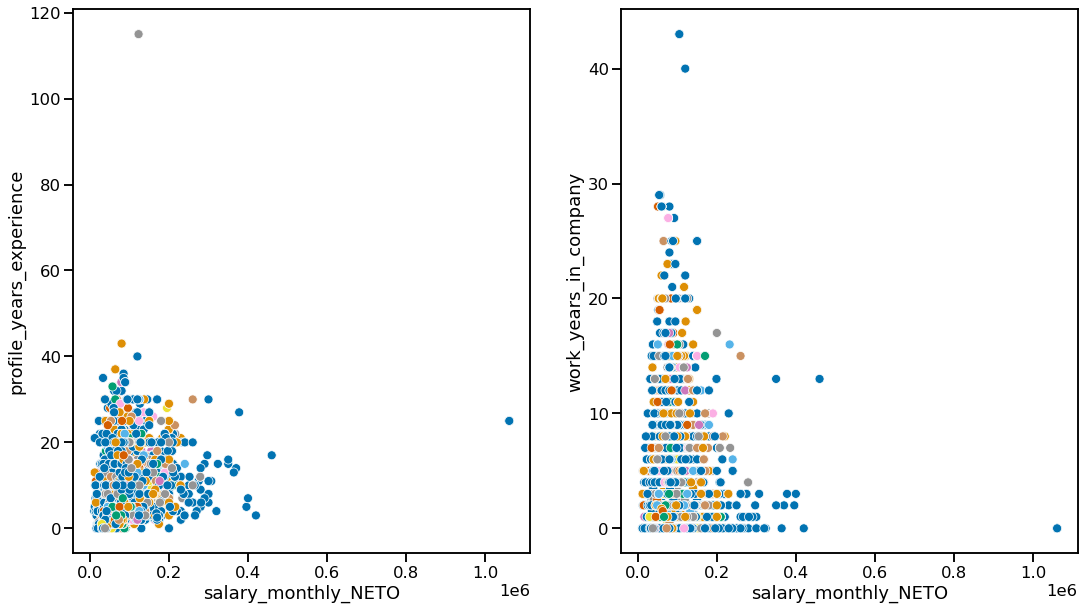

In [138]:

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

#profile year experience está altamente correlacionada
g_ = seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="profile_years_experience" , hue='salary_percentage_inflation_adjustment_2020', palette="colorblind",legend= False)

g = seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_years_in_company" , hue='salary_percentage_inflation_adjustment_2020',palette="colorblind",legend= False)


In [ ]:
# Se observa un outlayer importante en profile_years_experiencie. Lo eliminamos para que el diagrama no se 'compacte'

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='work_years_in_company'>

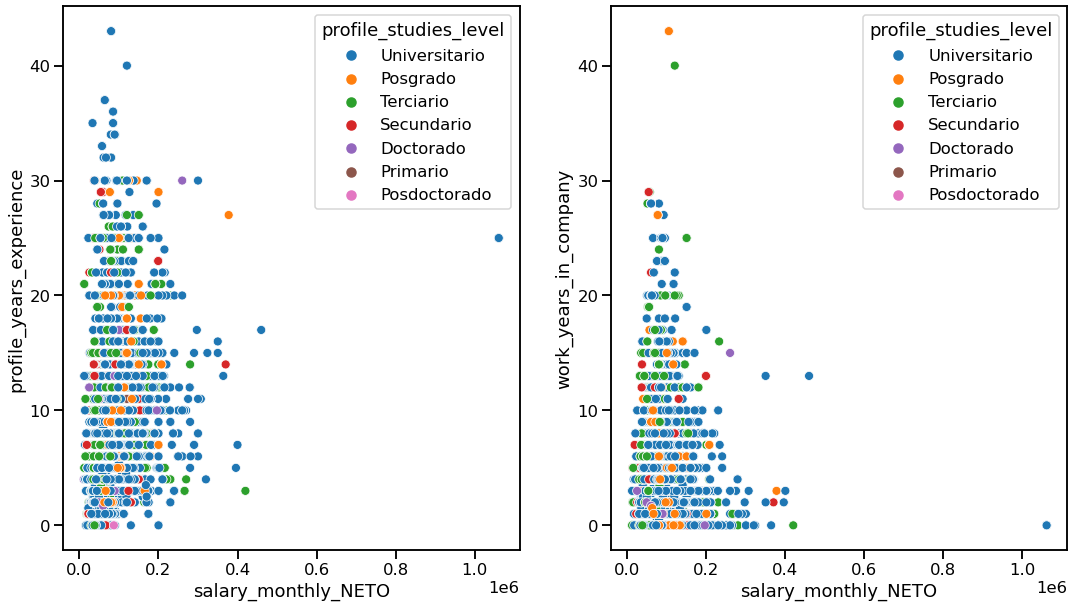

In [139]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))


seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="profile_years_experience" , hue="profile_studies_level")

seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="work_years_in_company" , hue="profile_studies_level")

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='work_people_in_charge_of'>

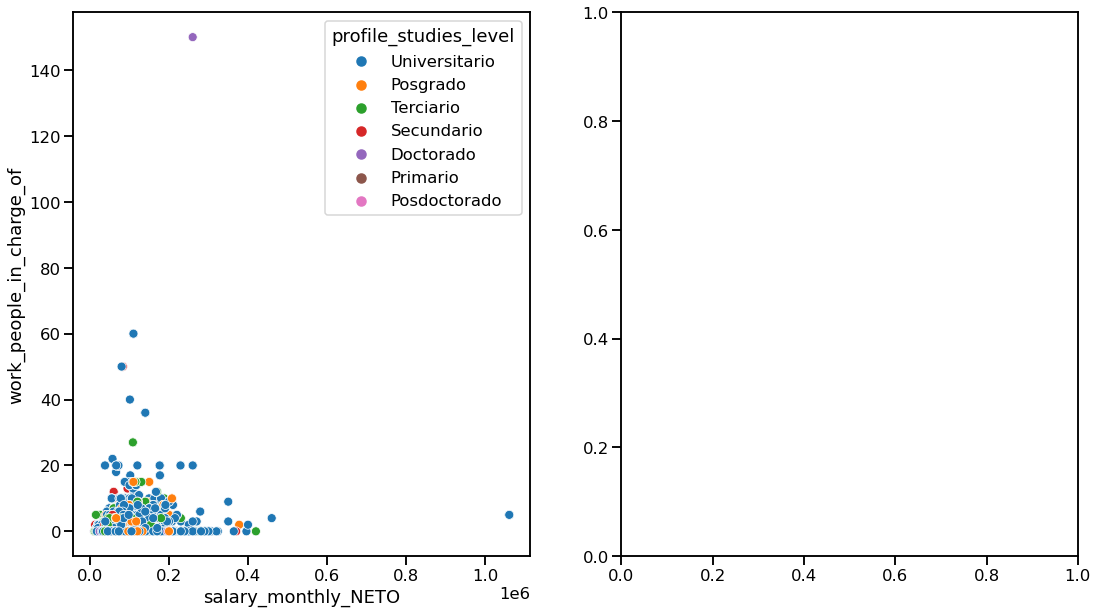

In [140]:

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))


seaborn.scatterplot(ax = axes[0]  ,data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="work_people_in_charge_of" , hue="profile_studies_level")